# Exploratory Data Analysis on Diamond Sales Data
#### By Vedant Thakur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df['price_float'] = df['price'].astype(float)

display(df['price_float'].head().to_frame())
display(df['price_float'].dtype) # checking if type cast correct
display(df['price_float'].head().values.tolist())

print('='*50, '\n\n')
display(df.price_float.value_counts().head())
print('='*50, '\n\n')
display(df.head())
df.dtypes

,price_float
0,326.0
1,326.0
2,327.0
3,334.0
4,335.0


dtype('float64')

[326.0, 326.0, 327.0, 334.0, 335.0]

price_float
605.0    132
802.0    127
625.0    126
828.0    125
776.0    124
Name: count, dtype: int64

,carat,cut,color,clarity,depth,table,price,x,y,z,price_float
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,326.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,326.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,327.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,334.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,335.0


carat          float64
cut             object
color           object
clarity         object
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64
price_float    float64
dtype: object

In [9]:
# Dropping original price column (int64)
df.drop(['price'], axis=1, inplace=True)

In [11]:
df.groupby(['carat'])['price_float'].agg(['min', 'mean', 'max'])

,min,mean,max
carat,,,
0.20,345.0,365.166667,367.0
0.21,326.0,380.222222,394.0
0.22,337.0,391.400000,470.0
0.23,326.0,486.143345,688.0
0.24,336.0,505.185039,963.0
...,...,...,...
4.00,15984.0,15984.000000,15984.0
4.01,15223.0,15223.000000,15223.0
4.13,17329.0,17329.000000,17329.0


In [12]:
df['carat'] > 0.60

0        False
1        False
2        False
3        False
4        False
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: carat, Length: 53940, dtype: bool

In [13]:
df_filtered = df[df['carat'] > 0.60]

print(f"""
Number of Rows:
    Filtered Data: {df_filtered.shape[0]:,}
    Original Data: {df.shape[0]:,}
"""
)


Number of Rows:
    Filtered Data: 29,492
    Original Data: 53,940



In [14]:
df_filtered.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_float
90,0.70,Ideal,E,SI1,62.5,57.0,5.70,5.72,3.57,2757.0
91,0.86,Fair,E,SI2,55.1,69.0,6.45,6.33,3.52,2757.0
92,0.70,Ideal,G,VS2,61.6,56.0,5.70,5.67,3.50,2757.0
93,0.71,Very Good,E,VS2,62.4,57.0,5.68,5.73,3.56,2759.0
94,0.78,Very Good,G,SI2,63.8,56.0,5.81,5.85,3.72,2759.0


In [15]:
display(df_filtered.sort_values('carat').head())

# original
display(df_filtered.head())

# sorted and saved to a new dataframe
df_filtered_sorted = df_filtered.sort_values('carat')
display(df_filtered_sorted.head())

,carat,cut,color,clarity,depth,table,x,y,z,price_float
36190,0.61,Good,G,I1,61.2,57.2,5.44,5.49,3.34,931.0
127,0.61,Very Good,D,VVS2,59.6,57.0,5.56,5.58,3.32,2763.0
51050,0.61,Ideal,G,VVS2,62.4,53.8,5.42,5.45,3.39,2331.0
51579,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31,2392.0
50963,0.61,Ideal,E,VS1,62.1,57.0,5.41,5.47,3.38,2324.0


,carat,cut,color,clarity,depth,table,x,y,z,price_float
90,0.70,Ideal,E,SI1,62.5,57.0,5.70,5.72,3.57,2757.0
91,0.86,Fair,E,SI2,55.1,69.0,6.45,6.33,3.52,2757.0
92,0.70,Ideal,G,VS2,61.6,56.0,5.70,5.67,3.50,2757.0
93,0.71,Very Good,E,VS2,62.4,57.0,5.68,5.73,3.56,2759.0
94,0.78,Very Good,G,SI2,63.8,56.0,5.81,5.85,3.72,2759.0


,carat,cut,color,clarity,depth,table,x,y,z,price_float
36190,0.61,Good,G,I1,61.2,57.2,5.44,5.49,3.34,931.0
127,0.61,Very Good,D,VVS2,59.6,57.0,5.56,5.58,3.32,2763.0
51050,0.61,Ideal,G,VVS2,62.4,53.8,5.42,5.45,3.39,2331.0
51579,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31,2392.0
50963,0.61,Ideal,E,VS1,62.1,57.0,5.41,5.47,3.38,2324.0


Visualisations

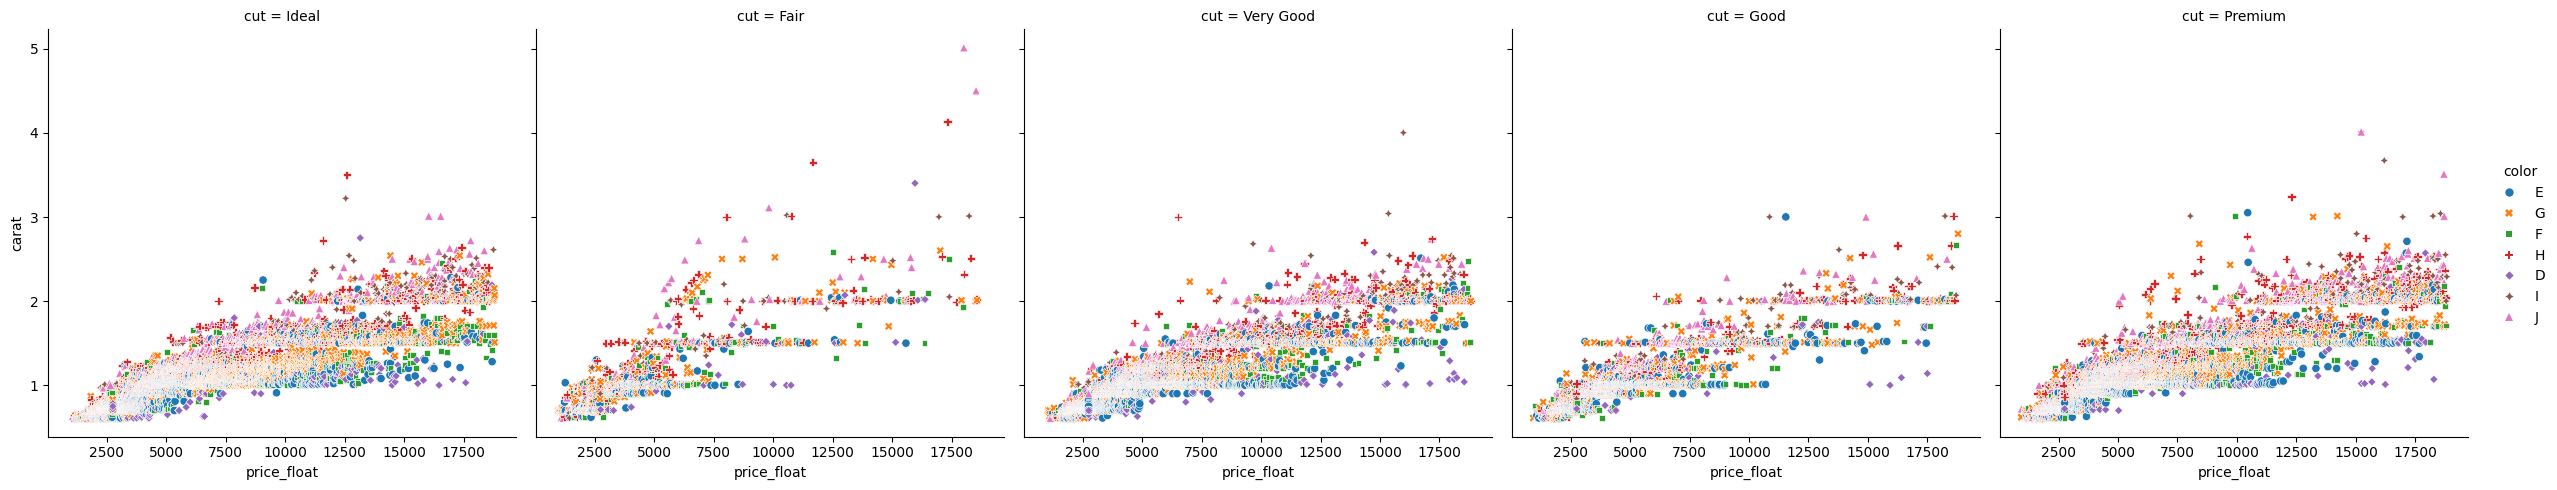

In [17]:
sns.relplot(
    data = df_filtered,
    x = "price_float", y = "carat", col = "cut",
    hue = "color", style = "color",
)

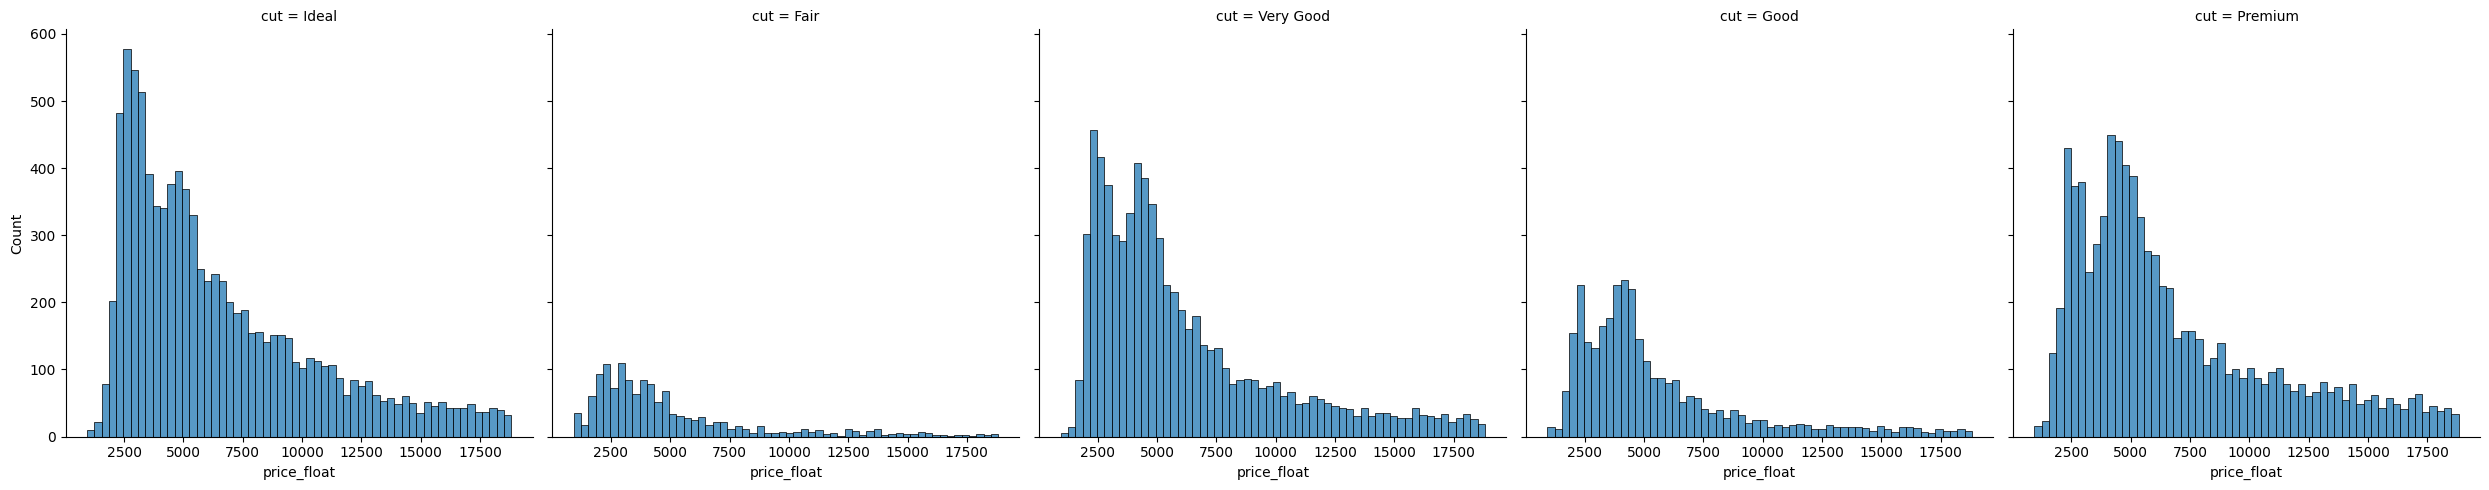

In [18]:
sns.displot(
    data = df_filtered, 
    x = "price_float", 
    col = "cut"
)

<Axes: xlabel='price_float', ylabel='carat'>

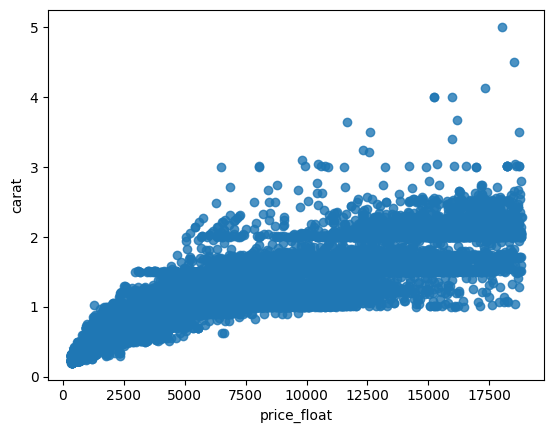

In [20]:
sns.regplot(df, x='price_float', y='carat')

<Axes: xlabel='carat', ylabel='depth'>

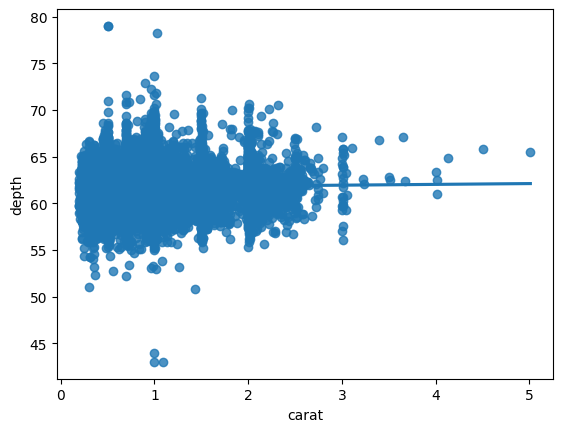

In [21]:
sns.regplot(df, x='carat', y='depth')